In [47]:
# Question 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf

In [48]:
dat = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Algeria = dat[dat['Country/Region'] == 'Algeria'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).unstack()
Algeria_wide = dat[dat['Country/Region'] == 'Algeria'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)

In [49]:
time_list=list(Algeria_wide.columns)
Algeria_long = pd.melt(Algeria_wide, value_vars=time_list,value_name='Accumulative Counts', ignore_index=False)
print(Algeria_long)

   variable  Accumulative Counts
2   1/22/20                    0
2   1/23/20                    0
2   1/24/20                    0
2   1/25/20                    0
2   1/26/20                    0
..      ...                  ...
2    3/5/23               271477
2    3/6/23               271477
2    3/7/23               271490
2    3/8/23               271494
2    3/9/23               271496

[1143 rows x 2 columns]


In [50]:
## convert from tuple to array
X = np.asarray(Algeria)  
print(X)
len(X)

[     0      0      0 ... 271490 271494 271496]


1143

In [51]:
## get case counts instead of cumulative counts
X = X[1 : X.size] - X[0 : (X.size - 1)]
len(X)

1142

In [52]:
X=np.insert(X,0,0)
len(X)
print(X)

[ 0  0  0 ... 13  4  2]


In [53]:
Algeria_long = Algeria_long.assign(Casecount = X)
print(Algeria_long)

   variable  Accumulative Counts  Casecount
2   1/22/20                    0          0
2   1/23/20                    0          0
2   1/24/20                    0          0
2   1/25/20                    0          0
2   1/26/20                    0          0
..      ...                  ...        ...
2    3/5/23               271477          8
2    3/6/23               271477          0
2    3/7/23               271490         13
2    3/8/23               271494          4
2    3/9/23               271496          2

[1143 rows x 3 columns]


In [54]:
Algeria_clean = Algeria_long[Algeria_long['Accumulative Counts'] >= 1]
Algeria_clean.head(20)

,variable,Accumulative Counts,Casecount
2,2/25/20,1,1
2,2/26/20,1,0
2,2/27/20,1,0
2,2/28/20,1,0
2,2/29/20,1,0
2,3/1/20,1,0
2,3/2/20,3,2
2,3/3/20,5,2
2,3/4/20,12,7
2,3/5/20,12,0


In [55]:
Algeria_clean = Algeria_clean.reset_index(drop=True)

In [56]:
Algeria_clean = Algeria_clean.reset_index()
Algeria_clean = Algeria_clean.rename(columns={"index": "t"})
print(Algeria_clean)

         t variable  Accumulative Counts  Casecount
0        0  2/25/20                    1          1
1        1  2/26/20                    1          0
2        2  2/27/20                    1          0
3        3  2/28/20                    1          0
4        4  2/29/20                    1          0
...    ...      ...                  ...        ...
1104  1104   3/5/23               271477          8
1105  1105   3/6/23               271477          0
1106  1106   3/7/23               271490         13
1107  1107   3/8/23               271494          4
1108  1108   3/9/23               271496          2

[1109 rows x 4 columns]


In [57]:
Algeria_clean = Algeria_clean.assign(Lag1 = Algeria_clean['Casecount'].shift(1))
Algeria_clean = Algeria_clean.assign(Lag2 = Algeria_clean['Casecount'].shift(2))
Algeria_clean = Algeria_clean.assign(Lag3 = Algeria_clean['Casecount'].shift(3))
Algeria_clean = Algeria_clean.assign(Lag4 = Algeria_clean['Casecount'].shift(4))
Algeria_clean = Algeria_clean.assign(Lag5 = Algeria_clean['Casecount'].shift(5))
Algeria_clean.head(15)

,t,variable,Accumulative Counts,Casecount,Lag1,Lag2,Lag3,Lag4,Lag5
0,0,2/25/20,1,1,NaN,NaN,NaN,NaN,NaN
1,1,2/26/20,1,0,1.0,NaN,NaN,NaN,NaN
2,2,2/27/20,1,0,0.0,1.0,NaN,NaN,NaN
3,3,2/28/20,1,0,0.0,0.0,1.0,NaN,NaN
4,4,2/29/20,1,0,0.0,0.0,0.0,1.0,NaN
5,5,3/1/20,1,0,0.0,0.0,0.0,0.0,1.0
6,6,3/2/20,3,2,0.0,0.0,0.0,0.0,0.0
7,7,3/3/20,5,2,2.0,0.0,0.0,0.0,0.0
8,8,3/4/20,12,7,2.0,2.0,0.0,0.0,0.0
9,9,3/5/20,12,0,7.0,2.0,2.0,0.0,0.0


In [58]:
Algeria_clean = Algeria_clean.dropna(axis='rows')
Algeria_clean.head(15)

,t,variable,Accumulative Counts,Casecount,Lag1,Lag2,Lag3,Lag4,Lag5
5,5,3/1/20,1,0,0.0,0.0,0.0,0.0,1.0
6,6,3/2/20,3,2,0.0,0.0,0.0,0.0,0.0
7,7,3/3/20,5,2,2.0,0.0,0.0,0.0,0.0
8,8,3/4/20,12,7,2.0,2.0,0.0,0.0,0.0
9,9,3/5/20,12,0,7.0,2.0,2.0,0.0,0.0
10,10,3/6/20,17,5,0.0,7.0,2.0,2.0,0.0
11,11,3/7/20,17,0,5.0,0.0,7.0,2.0,2.0
12,12,3/8/20,19,2,0.0,5.0,0.0,7.0,2.0
13,13,3/9/20,20,1,2.0,0.0,5.0,0.0,7.0
14,14,3/10/20,20,0,1.0,2.0,0.0,5.0,0.0


In [60]:
results = smf.ols('Casecount ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data = Algeria_clean).fit()
print(results.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.975     
Dependent Variable: Casecount        AIC:                11932.7518
Date:               2023-04-12 13:52 BIC:                11962.7920
No. Observations:   1104             Log-Likelihood:     -5960.4   
Df Model:           5                F-statistic:        8439.     
Df Residuals:       1098             Prob (F-statistic): 0.00      
R-squared:          0.975            Scale:              2879.5    
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
Intercept    4.8169     2.0144    2.3912   0.0170    0.8644    8.7694
Lag1         0.9155     0.0302   30.3429   0.0000    0.8563    0.9747
Lag2         0.2783     0.0406    6.8539   0.0000    0.1986    0.3580
Lag3        -0.0264     0.0415   -0.6356   0.5252   -0

## Response:
The coeffecient for Lag1 (beta1=0.92) means that each one unit increase in case count on Day t-1 will lead to 0.92 unit increase in case count on Day t, when case counts on other days keep the same. 
The coeffecient for Lag2 (beta2=0.28) means that each one unit increase in case count on Day t-2 will lead to 0.28 unit increase in case count on Day t, when case counts on other days keep the same. 
The coeffecient for Lag3 (beta3=-0.03) means that each one unit increase in case count on Day t-3 will lead to 0.03 unit decrease in case count on Day t, when case counts on other days keep the same. 
The coeffecient for Lag4 (beta4=-0.16) means that each one unit increase in case count on Day t-4 will lead to 0.16 unit decrease in case count on Day t, when case counts on other days keep the same. 
The coeffecient for Lag5 (beta1=-0.02) means that each one unit increase in case count on Day t-5 will lead to 0.02 unit decrease in case count on Day t, when case counts on other days keep the same. 

In [61]:
# Question 2

## a. fit the model on (all of) A and apply it to (all of) A

results = smf.ols('Casecount ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data = Algeria_clean).fit()
print(results.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.975     
Dependent Variable: Casecount        AIC:                11932.7518
Date:               2023-04-12 13:52 BIC:                11962.7920
No. Observations:   1104             Log-Likelihood:     -5960.4   
Df Model:           5                F-statistic:        8439.     
Df Residuals:       1098             Prob (F-statistic): 0.00      
R-squared:          0.975            Scale:              2879.5    
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
Intercept    4.8169     2.0144    2.3912   0.0170    0.8644    8.7694
Lag1         0.9155     0.0302   30.3429   0.0000    0.8563    0.9747
Lag2         0.2783     0.0406    6.8539   0.0000    0.1986    0.3580
Lag3        -0.0264     0.0415   -0.6356   0.5252   -0

In [62]:
b0hat = results.params['Intercept']
b1hat = results.params['Lag1']
b2hat = results.params['Lag2']
b3hat = results.params['Lag3']
b4hat = results.params['Lag4']
b5hat = results.params['Lag5']
print(b0hat, b1hat, b2hat, b3hat, b4hat, b5hat)

4.816904069291046 0.9154906814256283 0.2783101615624417 -0.02635079662774345 -0.1649773687457966 -0.022062615231439486


In [63]:
Algeria_clean = Algeria_clean.assign(yhat = b0hat + b1hat*Algeria_clean['Lag1'] + b2hat*Algeria_clean['Lag2'] + b3hat*Algeria_clean['Lag3'] + b4hat*Algeria_clean['Lag4'] + b5hat*Algeria_clean['Lag5'])
Algeria_clean = Algeria_clean.assign(predicterror = Algeria_clean['yhat'] - Algeria_clean['Casecount'])
Algeria_clean.head()

,t,variable,Accumulative Counts,Casecount,Lag1,Lag2,Lag3,Lag4,Lag5,yhat,predicterror
5,5,3/1/20,1,0,0.0,0.0,0.0,0.0,1.0,4.794841,4.794841
6,6,3/2/20,3,2,0.0,0.0,0.0,0.0,0.0,4.816904,2.816904
7,7,3/3/20,5,2,2.0,0.0,0.0,0.0,0.0,6.647885,4.647885
8,8,3/4/20,12,7,2.0,2.0,0.0,0.0,0.0,7.204506,0.204506
9,9,3/5/20,12,0,7.0,2.0,2.0,0.0,0.0,11.729258,11.729258


Text(0, 0.5, 'Prediction Error')

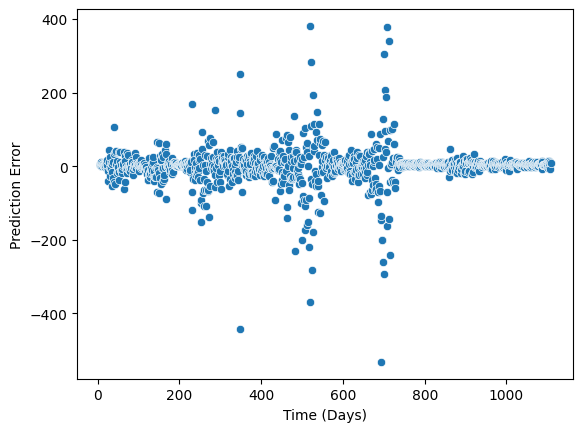

In [64]:
sns.scatterplot(data=Algeria_clean, x="t", y="predicterror")
plt.xlabel('Time (Days)')
plt.ylabel('Prediction Error')

In [65]:
## b.  fit A on the first half of the time for A
b = int(len(Algeria_clean)/2)
print(b)
Algeria_half = Algeria_clean.iloc[:b,:]
print(len(Algeria_clean), len(Algeria_half))

552
1104 552


In [66]:
results2 = smf.ols('Casecount ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data = Algeria_half).fit()
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.968    
Dependent Variable: Casecount        AIC:                6008.2204
Date:               2023-04-12 13:53 BIC:                6034.1017
No. Observations:   552              Log-Likelihood:     -2998.1  
Df Model:           5                F-statistic:        3356.    
Df Residuals:       546              Prob (F-statistic): 0.00     
R-squared:          0.968            Scale:              3089.5   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       6.0586    3.6093   1.6786  0.0938  -1.0312  13.1484
Lag1            0.7421    0.0428  17.3560  0.0000   0.6581   0.8260
Lag2            0.3427    0.0533   6.4289  0.0000   0.2380   0.4475
Lag3           -0.1174    0.0551  -2.1323  0.0334  -0.2256  -0.0092
Lag4  

In [67]:
b0hat2 = results2.params['Intercept']
b1hat2 = results2.params['Lag1']
b2hat2 = results2.params['Lag2']
b3hat2 = results2.params['Lag3']
b4hat2 = results2.params['Lag4']
b5hat2 = results2.params['Lag5']
print(b0hat2, b1hat2, b2hat2, b3hat2, b4hat2, b5hat2)

6.058596686666201 0.7420578402115459 0.3427400123875185 -0.11740611639384069 -0.02570359376193221 0.04371525320638622


In [68]:
Algeria_clean = Algeria_clean.assign(yhat2 = b0hat2 + b1hat2*Algeria_clean['Lag1'] + b2hat2*Algeria_clean['Lag2'] + b3hat2*Algeria_clean['Lag3'] + b4hat2*Algeria_clean['Lag4'] + b5hat2*Algeria_clean['Lag5'])
Algeria_clean = Algeria_clean.assign(predicterror2 = Algeria_clean['yhat2'] - Algeria_clean['Casecount'])
Algeria_clean.head()

,t,variable,Accumulative Counts,Casecount,Lag1,Lag2,Lag3,Lag4,Lag5,yhat,predicterror,yhat2,predicterror2
5,5,3/1/20,1,0,0.0,0.0,0.0,0.0,1.0,4.794841,4.794841,6.102312,6.102312
6,6,3/2/20,3,2,0.0,0.0,0.0,0.0,0.0,4.816904,2.816904,6.058597,4.058597
7,7,3/3/20,5,2,2.0,0.0,0.0,0.0,0.0,6.647885,4.647885,7.542712,5.542712
8,8,3/4/20,12,7,2.0,2.0,0.0,0.0,0.0,7.204506,0.204506,8.228192,1.228192
9,9,3/5/20,12,0,7.0,2.0,2.0,0.0,0.0,11.729258,11.729258,11.703669,11.703669


Text(0, 0.5, 'Prediction Error')

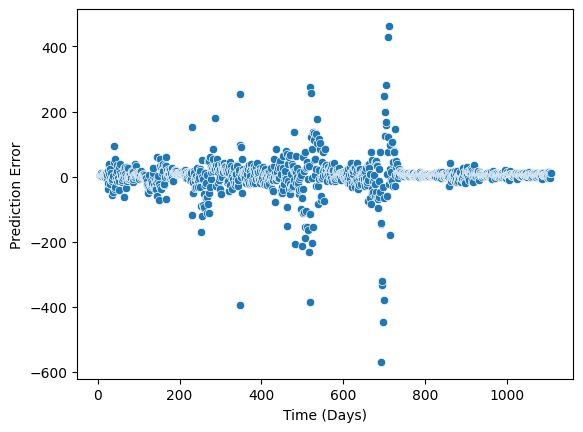

In [69]:
sns.scatterplot(data=Algeria_clean, x="t", y="predicterror2")
plt.xlabel('Time (Days)')
plt.ylabel('Prediction Error')

# Response
The prediction error increases with increasing time. The prediction error for using all data as training data is smaller than the predction error when using half data as training data.

In [70]:
# Question 3

##Prepare Italy Data
Italy = dat[dat['Country/Region'] == 'Italy'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).unstack()
Italy_wide = dat[dat['Country/Region'] == 'Italy'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)
time_list=list(Italy_wide.columns)
Italy_long = pd.melt(Italy_wide, value_vars=time_list,value_name='Accumulative Counts', ignore_index=False)

## get case counts instead of cumulative counts
X = np.asarray(Italy)  
X = X[1 : X.size] - X[0 : (X.size - 1)]
X = np.insert(X,0,0)
print(X)
Italy_long = Italy_long.assign(Casecount = X)
Italy_clean = Italy_long[Italy_long['Accumulative Counts'] >= 1]
Italy_clean = Italy_clean.reset_index(drop=True)
Italy_clean = Italy_clean.reset_index()
Italy_clean = Italy_clean.rename(columns={"index": "t"})
Italy_clean = Italy_clean.assign(Lag1 = Italy_clean['Casecount'].shift(1))
Italy_clean = Italy_clean.assign(Lag2 = Italy_clean['Casecount'].shift(2))
Italy_clean = Italy_clean.assign(Lag3 = Italy_clean['Casecount'].shift(3))
Italy_clean = Italy_clean.assign(Lag4 = Italy_clean['Casecount'].shift(4))
Italy_clean = Italy_clean.assign(Lag5 = Italy_clean['Casecount'].shift(5))
Italy_clean = Italy_clean.dropna(axis='rows')
Italy_clean.head(50)

[0 0 0 ... 0 0 0]


,t,variable,Accumulative Counts,Casecount,Lag1,Lag2,Lag3,Lag4,Lag5
5,5,2/5/20,2,0,0.0,0.0,0.0,0.0,2.0
6,6,2/6/20,2,0,0.0,0.0,0.0,0.0,0.0
7,7,2/7/20,3,1,0.0,0.0,0.0,0.0,0.0
8,8,2/8/20,3,0,1.0,0.0,0.0,0.0,0.0
9,9,2/9/20,3,0,0.0,1.0,0.0,0.0,0.0
10,10,2/10/20,3,0,0.0,0.0,1.0,0.0,0.0
11,11,2/11/20,3,0,0.0,0.0,0.0,1.0,0.0
12,12,2/12/20,3,0,0.0,0.0,0.0,0.0,1.0
13,13,2/13/20,3,0,0.0,0.0,0.0,0.0,0.0
14,14,2/14/20,3,0,0.0,0.0,0.0,0.0,0.0


In [71]:
Italy_clean = Italy_clean.assign(yhat = b0hat + b1hat*Italy_clean['Lag1'] + b2hat*Italy_clean['Lag2'] + b3hat*Italy_clean['Lag3'] + b4hat*Italy_clean['Lag4'] + b5hat*Italy_clean['Lag5'])
Italy_clean = Italy_clean.assign(predicterror = Italy_clean['yhat'] - Italy_clean['Casecount'])
Italy_clean.head()

,t,variable,Accumulative Counts,Casecount,Lag1,Lag2,Lag3,Lag4,Lag5,yhat,predicterror
5,5,2/5/20,2,0,0.0,0.0,0.0,0.0,2.0,4.772779,4.772779
6,6,2/6/20,2,0,0.0,0.0,0.0,0.0,0.0,4.816904,4.816904
7,7,2/7/20,3,1,0.0,0.0,0.0,0.0,0.0,4.816904,3.816904
8,8,2/8/20,3,0,1.0,0.0,0.0,0.0,0.0,5.732395,5.732395
9,9,2/9/20,3,0,0.0,1.0,0.0,0.0,0.0,5.095214,5.095214


Text(0, 0.5, 'Prediction Error')

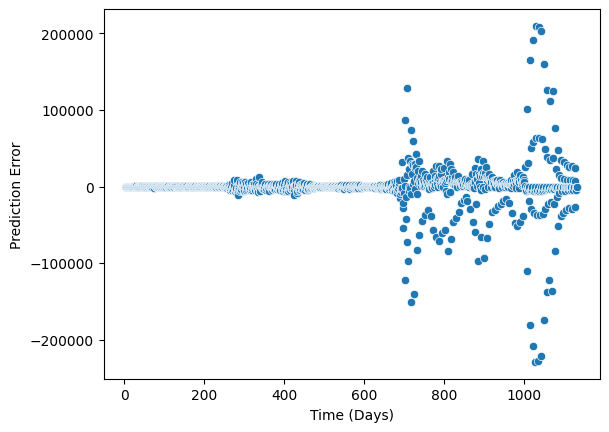

In [72]:
sns.scatterplot(data=Italy_clean, x="t", y="predicterror")
plt.xlabel('Time (Days)')
plt.ylabel('Prediction Error')

## Response
The prediction error for applying coefficients estimated from one country to another country is much larger than using the same country data as both training and test data. 

In [73]:
# Question 4
Algeria_clean.loc[Algeria_clean['Casecount'] > Algeria_clean['Lag1'], 'Z'] = 1
Algeria_clean.loc[~(Algeria_clean['Casecount'] > Algeria_clean['Lag1']), 'Z'] = 0
Algeria_clean['Z'] = Algeria_clean['Z'].astype(int)

In [74]:
Algeria_clean.loc[Algeria_clean['Lag1'] > Algeria_clean['Lag2'], 'Z1'] = 1
Algeria_clean.loc[~(Algeria_clean['Lag1'] > Algeria_clean['Lag2']), 'Z1'] = 0
Algeria_clean['Z1'] = Algeria_clean['Z1'].astype(int)

In [75]:
Algeria_clean.loc[Algeria_clean['Lag2'] > Algeria_clean['Lag3'], 'Z2'] = 1
Algeria_clean.loc[~(Algeria_clean['Lag2'] > Algeria_clean['Lag3']), 'Z2'] = 0
Algeria_clean['Z2'] = Algeria_clean['Z2'].astype(int)

In [76]:
Algeria_clean.loc[Algeria_clean['Lag3'] > Algeria_clean['Lag4'], 'Z3'] = 1
Algeria_clean.loc[~(Algeria_clean['Lag3'] > Algeria_clean['Lag4']), 'Z3'] = 0
Algeria_clean['Z3'] = Algeria_clean['Z3'].astype(int)

In [77]:
Algeria_clean.loc[Algeria_clean['Lag4'] > Algeria_clean['Lag5'], 'Z4'] = 1
Algeria_clean.loc[~(Algeria_clean['Lag4'] > Algeria_clean['Lag5']), 'Z4'] = 0
Algeria_clean['Z4'] = Algeria_clean['Z4'].astype(int)

In [78]:
Algeria_clean = Algeria_clean.assign(Lag6 = Algeria_clean['Casecount'].shift(6))
Algeria_clean = Algeria_clean.dropna(axis='rows')

In [79]:
Algeria_clean.loc[Algeria_clean['Lag5'] > Algeria_clean['Lag6'], 'Z5'] = 1
Algeria_clean.loc[~(Algeria_clean['Lag5'] > Algeria_clean['Lag6']), 'Z5'] = 0
Algeria_clean['Z5'] = Algeria_clean['Z5'].astype(int)

In [80]:
Algeria_clean.head(40)

,t,variable,Accumulative Counts,Casecount,Lag1,Lag2,Lag3,Lag4,Lag5,yhat,predicterror,yhat2,predicterror2,Z,Z1,Z2,Z3,Z4,Lag6,Z5
11,11,3/7/20,17,0,5.0,0.0,7.0,2.0,2.0,8.835822,8.835822,8.983066,8.983066,0,1,0,1,0,0.0,1
12,12,3/8/20,19,2,0.0,5.0,0.0,7.0,2.0,5.009488,3.009488,7.679802,5.679802,1,0,1,0,1,2.0,0
13,13,3/9/20,20,1,2.0,0.0,5.0,0.0,7.0,6.361693,5.361693,7.261689,6.261689,0,1,0,1,0,2.0,1
14,14,3/10/20,20,0,1.0,2.0,0.0,5.0,0.0,5.464128,5.464128,7.357617,7.357617,0,0,1,0,1,7.0,0
15,15,3/11/20,20,0,0.0,1.0,2.0,0.0,5.0,4.932200,4.932200,6.385101,6.385101,0,0,0,1,0,0.0,1
16,16,3/12/20,24,4,0.0,0.0,1.0,2.0,0.0,4.460599,0.460599,5.889783,1.889783,1,0,0,0,1,5.0,0
17,17,3/13/20,26,2,4.0,0.0,0.0,1.0,2.0,8.269764,6.269764,9.088555,7.088555,0,1,0,0,0,0.0,1
18,18,3/14/20,37,11,2.0,4.0,0.0,0.0,1.0,7.739063,-3.260937,8.957388,-2.042612,1,0,1,0,0,2.0,0
19,19,3/15/20,48,11,11.0,2.0,4.0,0.0,0.0,15.338519,4.338519,14.437088,3.437088,0,1,0,1,0,1.0,0
20,20,3/16/20,54,6,11.0,11.0,2.0,4.0,0.0,17.236102,11.236102,17.653746,11.653746,0,0,1,0,1,0.0,0


In [81]:
results3 = smf.logit('Z ~ Z1 + Z2 + Z3 + Z4 + Z5', data = Algeria_clean).fit()
print(results3.summary2())

Optimization terminated successfully.
         Current function value: 0.677285
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.015     
Dependent Variable: Z                AIC:              1499.3172 
Date:               2023-04-12 13:54 BIC:              1529.3246 
No. Observations:   1098             Log-Likelihood:   -743.66   
Df Model:           5                LL-Null:          -755.15   
Df Residuals:       1092             LLR p-value:      0.00034106
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.4805    0.1375  -3.4935  0.0005  -0.7501  -0.2109
Z1            -0.2556    0.1249  -2.0475  0.0406  -0.5003  -0.

# Response
The coefficient for Z1 means that if the Z(t-1) equals to 1 (refering to cases went up on day t-1), then the likelihood of having cases went up on day t is e(-0.256)=0.77. 
The coefficient for Z2 means that if the Z(t-2) equals to 1 (refering to cases went up on day t-2), then the likelihood of having cases went up on day t is e(0.167)=1.18. 
The coefficient for Z3 means that if the Z(t-3) equals to 1 (refering to cases went up on day t-3), then the likelihood of having cases went up on day t is e(0.159)=1.17. 
The coefficient for Z4 means that if the Z(t-4) equals to 1 (refering to cases went up on day t-4), then the likelihood of having cases went up on day t is e(0.492)=1.64. 
The coefficient for Z5 means that if the Z(t-5) equals to 1 (refering to cases went up on day t-5), then the likelihood of having cases went up on day t is e(0.035)=1.04. 